In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats import mode

%matplotlib inline
import re

warnings.filterwarnings('ignore')
%matplotlib inline

# 讀入train data

* 讀入data

In [47]:
df_train = pd.read_csv('datasets/train.csv')

* 檢視table基本資訊

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 處理空值

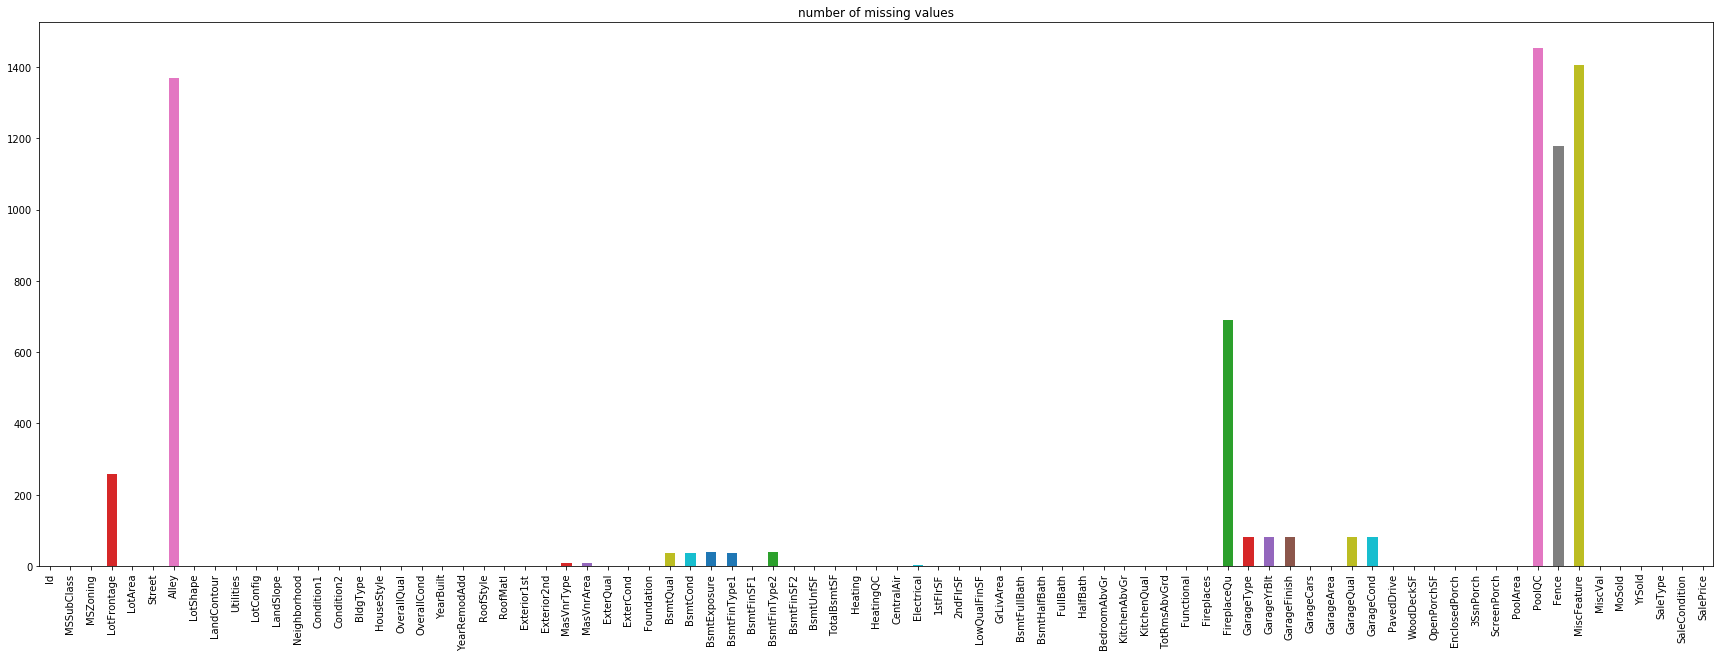

In [6]:
plt.figure(figsize=(30,10))
df_train.isnull() \
       .sum() \
       .plot(kind='bar',title='number of missing values')


以下5個欄位空值太多 (>40%)可以考慮整刪除

'LotFrontage','FireplaceQu','PoolQC','Fence', 'MiscFeature'

In [7]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


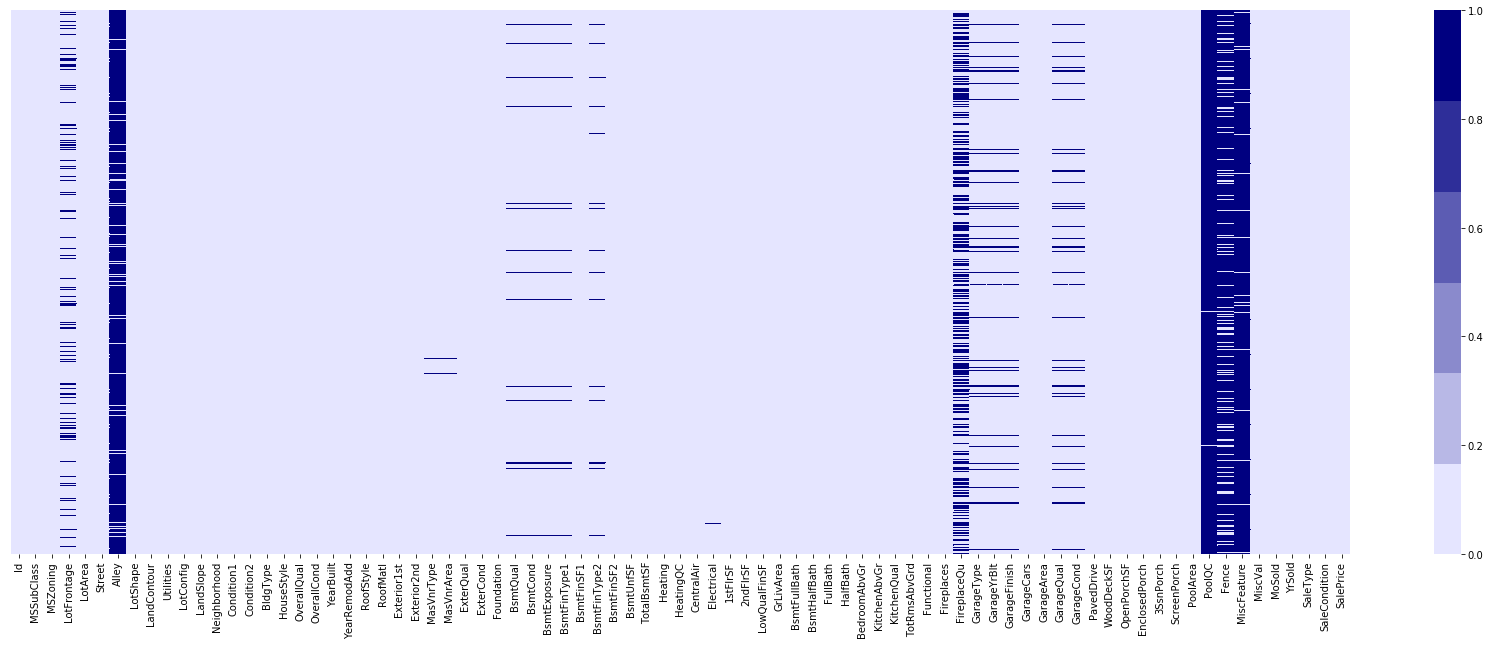

In [8]:
plt.figure(figsize=(30,10))
cmap=sns.light_palette("navy", reverse=False)
sns.heatmap(df_train.isnull().astype(np.int8),yticklabels=False,cmap=cmap)

### 數值型欄位

* GarageYrBlt
* LotFrontage
* MasVnrArea


Text(0,0.5,'Sales Price')

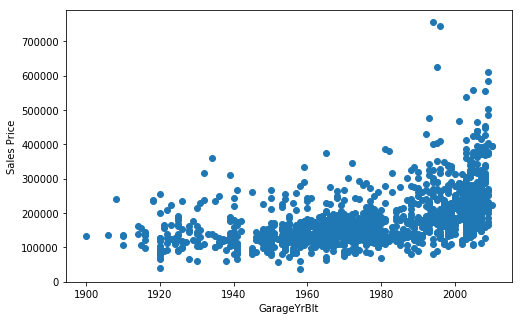

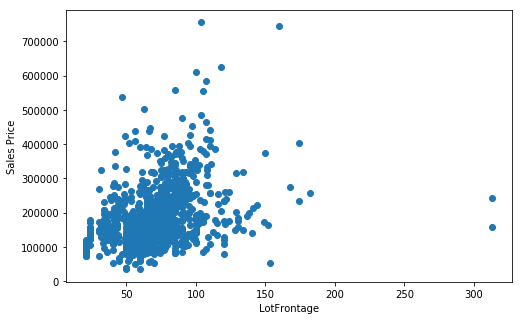

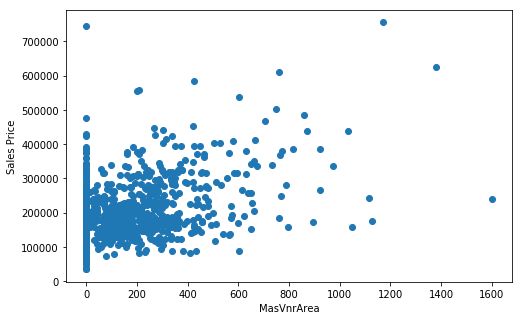

In [10]:
plt.figure(figsize=(8,5))
var = 'GarageYrBlt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

plt.figure(figsize=(8,5))
var = 'LotFrontage'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')

plt.figure(figsize=(8,5))
var = 'MasVnrArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = plt.scatter(x=var, y="SalePrice", data=data)
plt.xlabel(var)
plt.ylabel('Sales Price')


## 空值填補

### 數值型

* MasVnrArea 

In [12]:
#MasVnrArea 補眾數 0
#mode(df_train['MasVnrArea'].dropna())[0][0]:取眾數
df_train['MasVnrArea'].fillna((mode(df_train['MasVnrArea'].dropna())[0][0]), inplace=True)

In [13]:
df_train['MasVnrArea'].isnull().any()

False

* LotFrontage

In [14]:
df_train['LotFrontage'].isnull().sum()

259

In [15]:
df_train.groupby("LotConfig").median()["LotFrontage"]

LotConfig
Corner     80.0
CulDSac    50.0
FR2        64.0
FR3        59.5
Inside     68.0
Name: LotFrontage, dtype: float64

In [16]:
nanIndexes={}
groups=df_train.groupby("LotConfig")
for name,group in groups:
    nanIndexes[name]=group["LotFrontage"][group["LotFrontage"].isnull()].index
nanIndexes
df_train["LotFrontage"][nanIndexes['Corner']]=80
df_train["LotFrontage"][nanIndexes['CulDSac']]=50
df_train["LotFrontage"][nanIndexes['FR2']]=64
df_train["LotFrontage"][nanIndexes['FR3']]=59
df_train["LotFrontage"][nanIndexes['Inside']]=68

### 類別型

In [18]:
null_col = ['GarageCond','GarageType','GarageFinish', \
            'GarageQual','BsmtExposure','BsmtFinType2', \
            'BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']
null_col

['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical']

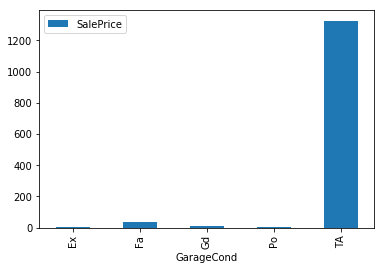

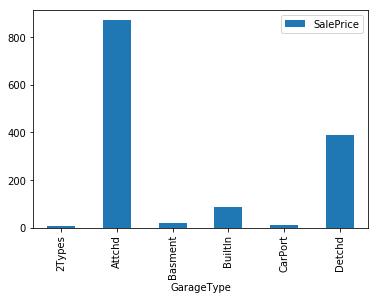

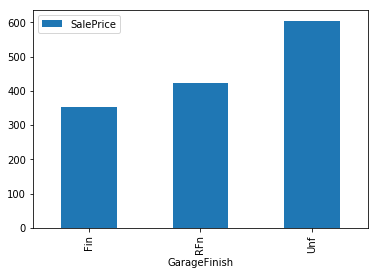

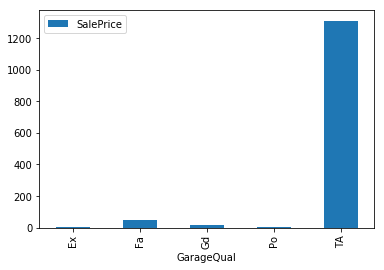

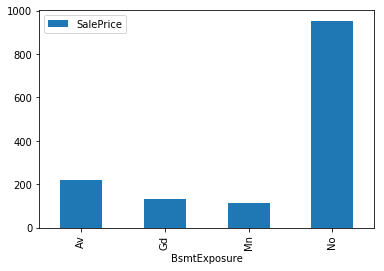

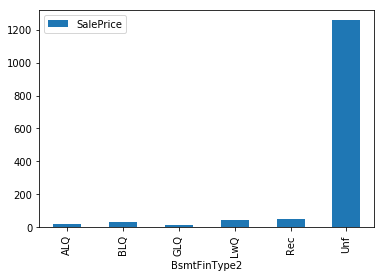

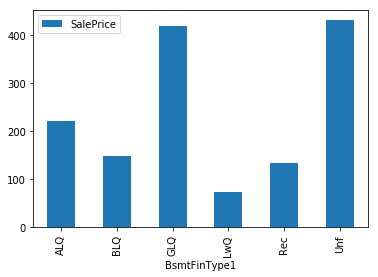

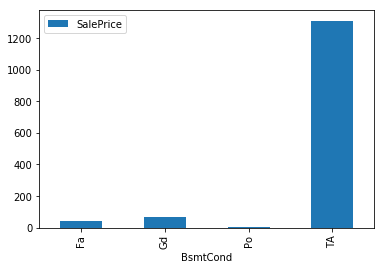

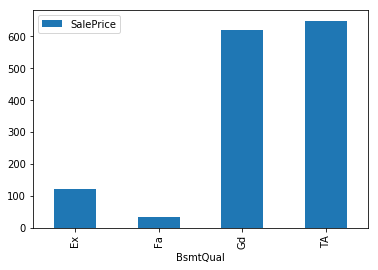

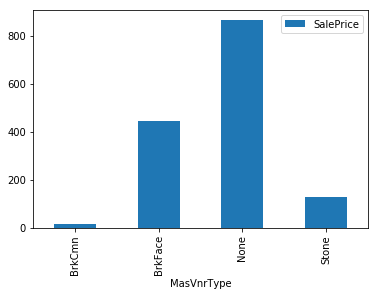

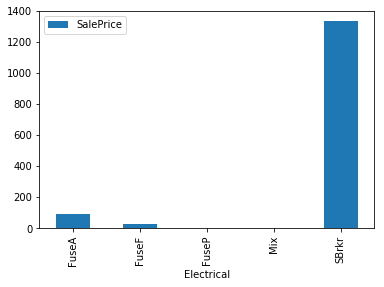

In [19]:
for col in null_col:
    ax=df_train[[col,'SalePrice']].groupby(col).count().plot(kind="bar")

In [20]:
#### fillna for object type columns
df_train.fillna({'GarageCond':'TA','GarageType':'No_define', 'GarageFinish':'No_define',\
                 'GarageQual':'TA','BsmtExposure':'No', 'BsmtFinType2':'Unf', 'BsmtFinType1':'No_define', \
                 'BsmtCond':'TA','BsmtQual':'No_define','MasVnrType':'None','Electrical':'SBrkr'}, inplace=True)

# drop some column

In [21]:
#drop those having missing data more than 40%
#drop 'GarageYrBlt' for highly colinier w/ YearBuilt
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageYrBlt,81,0.055479
BsmtExposure,0,0.000000
BsmtFinType1,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000


In [22]:
####drop columns
df_train_drop = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageYrBlt'],axis = 1)

In [23]:
df_train_drop.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Enclos

### check cleaned data

In [33]:
df_train_drop.shape

(1460, 75)

In [25]:
df_train_drop.isnull().any().sum()

0

# Scikit-learn

### one-hot & standarlizes

In [48]:
from sklearn.model_selection import train_test_split

In [62]:
#one-hot encoding
df_train_onehot = pd.get_dummies(df_train_drop)

In [65]:
df_train_onehot.shape

(1460, 275)

In [66]:
#split SalePrice for df_train & df_test
x = df_train_onehot.iloc[:, :-1].values
y = df_train_onehot['SalePrice'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [67]:
assert train_x.shape[0] == train_y.shape[0], 'error, check train/test data'

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [69]:
test_x.shape[0]+train_x.shape[0]

1460

In [70]:
test_y.shape[0]+train_y.shape[0]

1460

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [71]:
scaler = StandardScaler()         #對各欄位做標準化
scaler = scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)   #用與train_x相同的準換方式來轉換test_x

## 1. Lasso Regression

In [175]:
train_square = np.hstack([train_x**j for j in range(1,5)]   # 共5項
                                  )
test_square = np.hstack([test_x**j for j in range(1,5)]
                                  )

In [176]:
regressor = LinearRegression()
model = regressor.fit(train_square,train_y)

In [177]:
pred_y = model.predict(test__square)

In [178]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
[*regressor.coef_]

[-6.22028917263151e-09,
 4.73983678972445e-08,
 1.9233965531384456e-08,
 8.816385843601893e-09,
 5.918849410591065e-09,
 -1.8295120085554117e-08,
 3.3630040974230724e-09,
 -4.658158658799039e-08,
 5.029583693971773e-10,
 -26.350909417311147,
 -9.573542539804995,
 -27.347928888603633,
 25.699109205422403,
 123.67179306210711,
 142.4653184551532,
 15.694411112006451,
 -168.34932682101288,
 0.4545573015108142,
 1213.121656758773,
 -26.343849462253846,
 -17.581661435177146,
 -2.4401627714970564e-08,
 250.7488270141208,
 -2.980864791113369e-10,
 37.879485240516225,
 -376.158413824755,
 -2.912746165789626e-09,
 -1.0622613857980134e-08,
 4.665579934545749e-09,
 2.0037985711679474e-08,
 -1.2048892494322117e-07,
 -6.238654233492458e-08,
 -36.53088918820521,
 -1.4140266715824065e-07,
 -2.0135105958420108e-08,
 5.6104508955323595e-09,
 79161.88690747408,
 -176.22597890680598,
 18.442428054178713,
 -12.594344115561624,
 708.3754007335164,
 62.72690434132953,
 -37.17255251170086,
 1009.481397391734

In [180]:
regressor.coef_.shape

(1096,)

In [181]:
model.intercept_

182228.99506116143

In [182]:
r2_score(test_y,pred_y)

0.9257777647314684

In [183]:
from sklearn.linear_model import Lasso

In [184]:
regressor = Lasso(max_iter=100000000)
regressor

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [185]:
model = regressor.fit(train_square,train_y)
pred_y = model.predict(test_square)
r2_score(test_y,pred_y)

#ConvergenceWarning 更改參數 e.g. 提高max_iter

0.44012748746413954

## 2. Ridge Regression

In [186]:
from sklearn.linear_model import Ridge
regressor = Ridge(max_iter=100000000)
regressor

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [187]:
model = regressor.fit(train_square,train_y)
pred_y = model.predict(test_square)
r2_score(test_y,pred_y)

#ConvergenceWarning 更改參數 e.g. 提高max_iter

0.996827221192521

In [189]:
[*regressor.coef_]   #weight 

[51.61580579088168,
 304.92752338066424,
 163.67061284488707,
 502.03308506473707,
 474.6466786002377,
 339.1408678232619,
 204.565109792745,
 149.09028697779175,
 194.92720121463432,
 253.78426857901346,
 640.4950524000446,
 -17.70315481113525,
 479.9819439910049,
 444.5353997113521,
 569.1072398858507,
 -30.13666774596586,
 805.3584738430047,
 53.40201808222905,
 -0.4798997979260478,
 132.36907288572033,
 32.80280466150677,
 -46.447315983053805,
 -3.319760975568525,
 -51.298928708896966,
 46.422417097813685,
 71.41869868953101,
 45.588955341092415,
 98.23448980438974,
 92.66914662985225,
 90.69257439688528,
 -9.309353998928808,
 27.541927850924782,
 0.5906755171695981,
 -161.0125538279839,
 39.50705579203042,
 -66.97913465492286,
 74979.84883403506,
 -0.00011274193865065225,
 0.0051874163794645226,
 5.465557890476552e-05,
 0.5555844089045084,
 -0.6361227818083842,
 -1.153712611665954e-06,
 1.153712611665954e-06,
 -1.7549197026555732,
 -0.0007539516048781497,
 3.357879836091604e-06,
 

In [190]:
model.intercept_

181876.11273188348

## 3. Elastic Net Regression

In [191]:
from sklearn.linear_model import ElasticNet

In [192]:
regressor = ElasticNet(max_iter=1000000)
regressor

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [193]:
model = regressor.fit(train_square,train_y)
pred_y = model.predict(test_square)
r2_score(test_y,pred_y)

-13.16921378476811

## 4. XGBoost

In [194]:
import xgboost as xgb
xgb.__version__

'0.7.post3'